In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## **Importing data**

### Geophysical data

In [3]:
file_cp1 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\3D_P1_Guidel_MGL_v2.dat"
file_cp2 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\3D_P2_Guidel_MGL_v2.dat"
coupe_1 = pd.read_csv(file_cp1, sep=" ")
coupe_2 = pd.read_csv(file_cp2, sep=" ")

In [4]:
ft = ["X", "Y", "Z", "mgl", "vp"]
coupe_1 = coupe_1[ft]
coupe_2 = coupe_2[ft]
coupes = pd.concat([coupe_1, coupe_2], ignore_index=1)

In [5]:
slice1 = coupes.iloc[0:len(coupe_1)]
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)

## Wells data

In [6]:
file_well_PZ26 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\PZ26_devie.txt"
file_well_PSR5 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\PSR5_well.txt"
file_well_PSR6 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\PSR6_well.txt"
PZ26_well = pd.read_csv(file_well_PZ26, sep='\t')
PZ26_well = pd.read_csv(file_well_PZ26, sep='\t')
PSR5_well = pd.read_csv(file_well_PSR5, sep='\t')
PSR6_well = pd.read_csv(file_well_PSR6, sep='\t')

In [7]:
points = PZ26_well[['X', 'Y', 'Z', 'Depth', 'Soil_type']]
PZ26 = points.iloc[:3]
wells = pd.concat([PSR5_well, PSR6_well, PZ26], ignore_index=1)

___

## Logarithmic transformation

In [8]:
coupes['mgl_norm'] = np.log(coupes['mgl'])
coupes['vp_norm'] = np.log(coupes['vp'])

___

## Preliminary visualization of the electrical parameter (MGL)

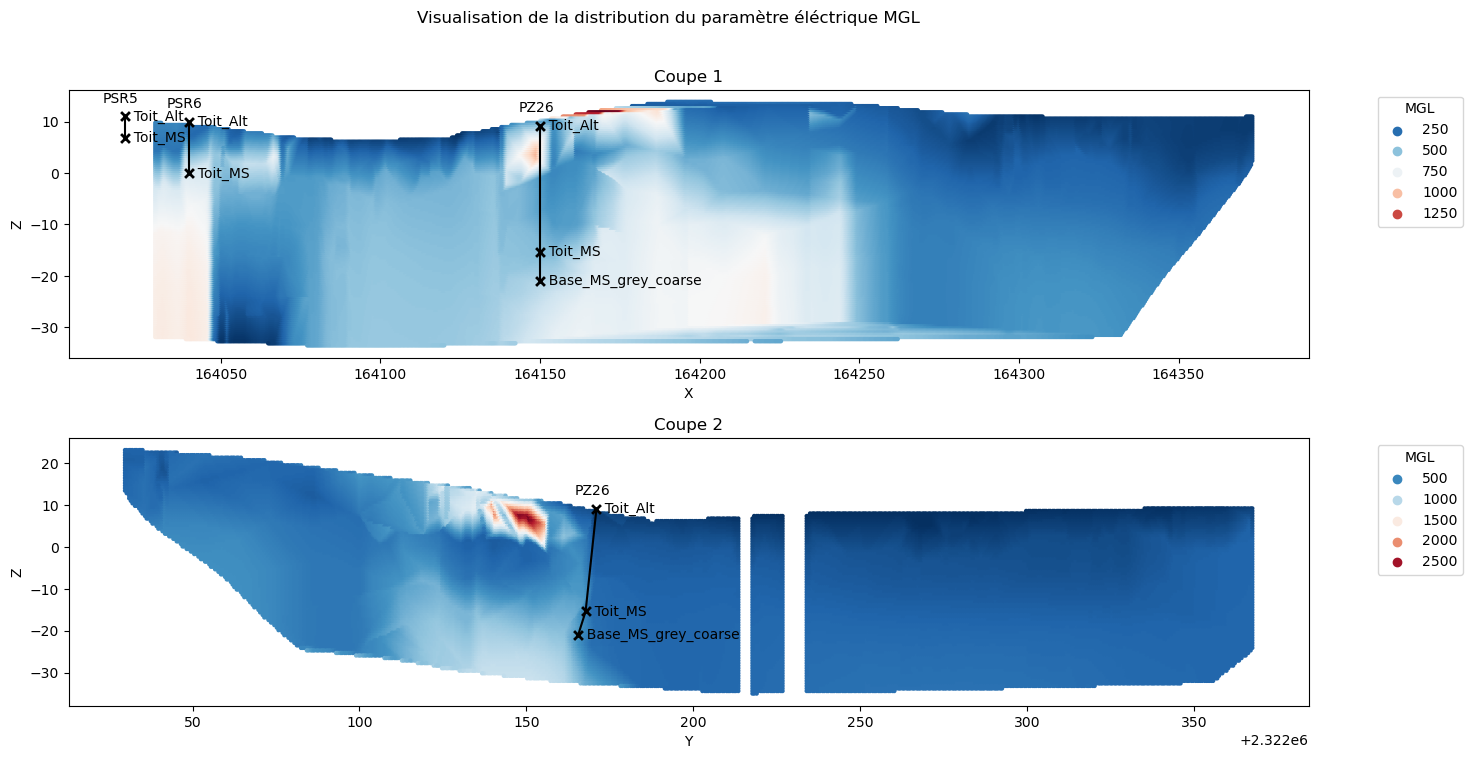

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
fig.suptitle("Visualisation de la distribution du paramètre éléctrique MGL")

sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['mgl'], s=10,ax=axes[0],palette='RdBu_r',linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['mgl'], s=10,ax=axes[1],palette='RdBu_r',linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='MGL')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='MGL')
 
plt.subplots_adjust(hspace=0.3)
plt.show()

## Preliminary visualization of seismic parameter (Vp)

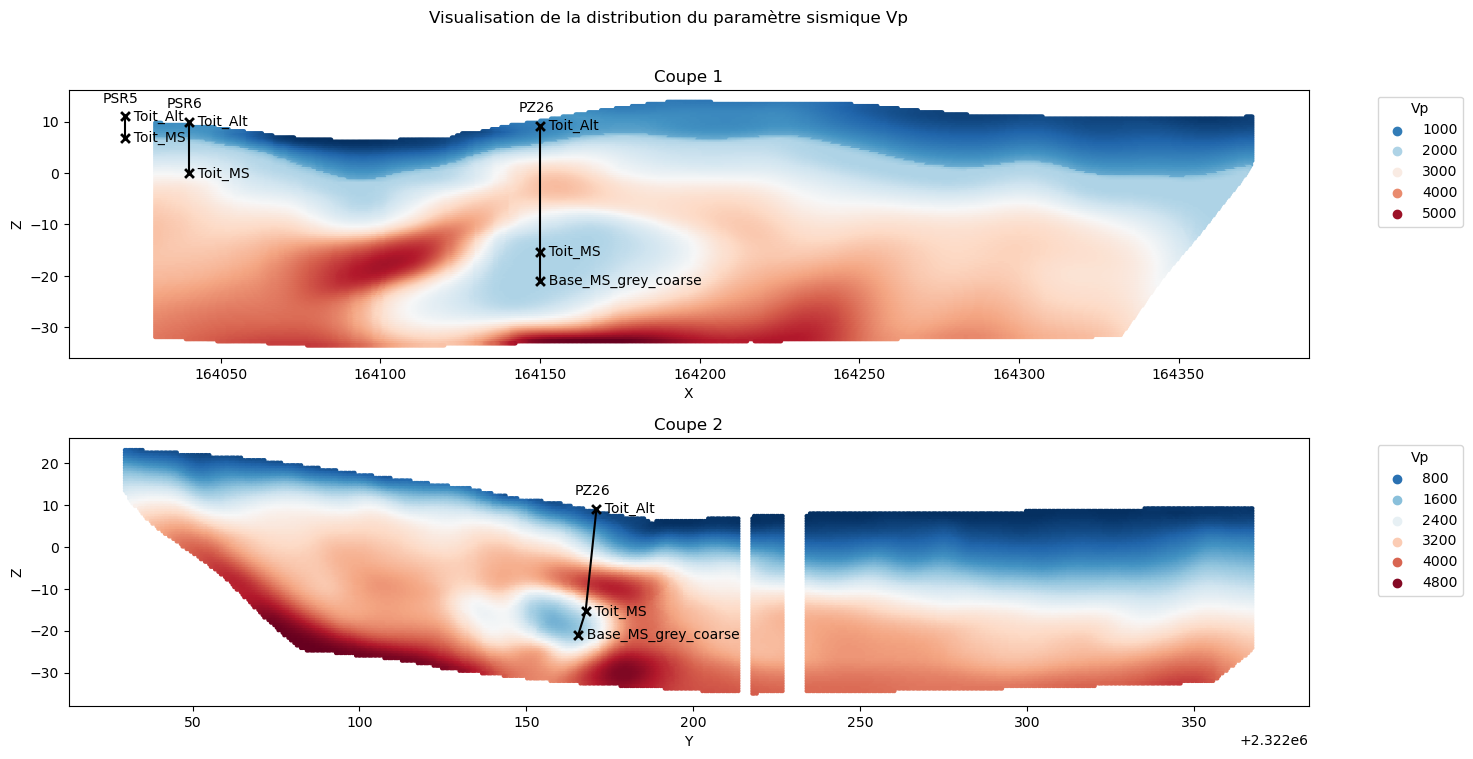

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
#crest, RdYlBu, coolwarm, !!RdBu_r!!
fig.suptitle("Visualisation de la distribution du paramètre sismique Vp")
#coupe 1
sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['vp'], s=10,ax=axes[0],palette='RdBu_r',linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

#coupe 2
sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['vp'], s=10,ax=axes[1],palette='RdBu_r',linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

# Move the legend outside the plots
legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Vp')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Vp')

plt.subplots_adjust(hspace=0.3)
plt.show()

___

## **Regressed parameters**

### Depth calculation

In [11]:
coupes['P'] = coupes.groupby(['X', 'Y'])['Z'].transform(lambda x: x.max() - x)

### Electrical parameter (MGL)

In [ ]:
mgl = coupes['mgl']
Z = coupes['P']

mgl = np.array(mgl).reshape(-1, 1)
Z = np.array(Z).reshape(-1, 1)

model = LinearRegression()
model.fit(Z, mgl)

mgl_pred = model.predict(Z)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

coupes['mgl_r'] = coupes['mgl'] - (slope * coupes['P'] + intercept)

equation = f"""mgl = {slope:.2f} * P + {intercept:.2f}"""
print("Equation :", equation)

### Seismic parameter (Vp)

In [ ]:
vp = coupes['vp']
Z = coupes['P']

vp = np.array(vp).reshape(-1, 1)
Z = np.array(Z).reshape(-1, 1)

model = LinearRegression()
model.fit(Z, vp)

vp_pred = model.predict(Z)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

coupes['vp_r'] = coupes['vp'] - (slope * coupes['P'] + intercept)

equation = f"vp = {slope:.2f} * P + {intercept:.2f}"
print("Equation :", equation)

### Logarithmic transformation

In [14]:
coupes['mgl_r_norm'] = pd.DataFrame({'mgl_r': np.log(coupes['mgl_r']+2*np.abs(min(coupes['mgl_r'])))})
coupes['vp_r_norm'] = pd.DataFrame({'vp_r': np.log(coupes['vp_r']+2*np.abs(min(coupes['vp_r'])))})
coupes

,X,Y,Z,mgl,vp,mgl_norm,vp_norm,P,mgl_r,vp_r,mgl_r_norm,vp_r_norm
0,164189.875000,2322155.00,13.832981,252.414520,984.434570,5.531073,6.892067,0.000000,-48.164223,-180.703669,6.772812,8.173680
1,164190.265625,2322155.00,13.832981,252.187393,984.488831,5.530172,6.892123,0.000000,-48.391350,-180.649408,6.772552,8.173695
2,164190.656250,2322154.75,13.832981,251.960281,984.933594,5.529271,6.892574,0.000000,-48.618462,-180.204645,6.772292,8.173820
3,164191.046875,2322154.75,13.832981,251.733154,983.090027,5.528370,6.890701,0.000000,-48.845589,-182.048212,6.772032,8.173301
4,164191.453125,2322154.75,13.832981,251.506027,981.326721,5.527467,6.888905,0.000000,-49.072716,-183.811518,6.771772,8.172803
...,...,...,...,...,...,...,...,...,...,...,...,...
126958,164154.984375,2322205.25,-34.409428,319.750793,4121.173340,5.767542,8.323893,41.213208,-240.193372,-92.791934,6.524643,8.198167
126959,164154.953125,2322204.00,-34.409428,319.205536,4124.683594,5.765835,8.324745,40.607131,-236.924429,-44.445958,6.529427,8.211382
126960,164156.046875,2322219.00,-35.015503,336.925171,4047.590332,5.819861,8.305877,42.425359,-230.647375,-256.046165,6.538548,8.152206
126961,164155.953125,2322218.25,-35.015503,336.671021,4051.986572,5.819106,8.306963,42.425359,-230.901525,-251.649925,6.538181,8.153472


___

# **Clustering**
 

### DBSCAN 1D

In [ ]:
from sklearn.cluster import DBSCAN

###* clustering parameters *###
eps = 0.008
min_sample = 1000
###############################

#####* clustering data *#######
dataset_DB = ['mgl_norm']
###############################

algo = 'DBSCAN'
dim = dataset_DB

dbscan = DBSCAN(eps=eps,min_samples=min_sample)
dbscan_predict = coupes[dataset_DB]
dbscan.fit(dbscan_predict)
labels = dbscan.labels_
coupes['label'] = labels
noise = np.count_nonzero(labels == -1)

print("Total Clusters :", len(np.unique(labels)))
print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")

slice1 = coupes.iloc[0:len(coupe_1)]
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)

print("labels coupe 1 :",np.unique(slice1['label']))
print("labels coupe 2 :",np.unique(slice2['label']))
print("Nombre total des clusters :",len(np.unique(labels)))

### DBSCAN 2D

In [ ]:
from dbscan import DBSCAN

### clustering parameters ###
eps = 0.055
min_sample = 280
#############################

##### clustering data #######
dataset_DB = ['mgl_norm', 'vp_norm']
#############################

dim = dataset_DB
labels, core_samples_mask = DBSCAN(coupes[dataset_DB], eps=eps, min_samples=min_sample)
algo = 'DBSCAN'
coupes['label'] = labels

slice1 = coupes.iloc[0:len(coupe_1)]
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)

print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))

### HDBSCAN

In [ ]:
import hdbscan

### clustering parameters ###
min_samples = 600
min_cluster_size = 300
#############################

##### clustering data #######
dataset_HDB = ['mgl_r_norm']
#############################

algo = 'HDBSCAN'
dim = dataset_HDB
data = coupes[dataset_HDB].values
epsilon_HDB = 0

hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples,min_cluster_size=min_cluster_size,cluster_selection_epsilon=epsilon_HDB)
hdbscan_labels = hdbscan_model.fit_predict(data)
labels = hdbscan_labels
coupes['label'] = labels
noise = np.count_nonzero(labels == -1)

print("Total Clusters :", len(np.unique(labels)))
print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")

slice1 = coupes.iloc[0:len(coupe_1)]
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)

print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))

___

# **Displaying clustering results**

### geological sections

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

unique_labels = coupes['label'].unique()

color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

colors = coupes['label'].map(color_map)

sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['label'], s=3,ax=axes[0],palette=color_map,linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')

sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['label'], s=10,ax=axes[1],palette=color_map,linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')

sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

if algo == 'DBSCAN':
    clustering_params = f"Algorithm: {algo} | Parameters: {str(dataset_DB)} | Epsilon: {eps} | Min samples: {min_sample}"
elif algo == 'HDBSCAN':
    if hdbscan_model.cluster_selection_epsilon == 0:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}"
    else:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}\nCluster_selection_epsilon: {hdbscan_model.cluster_selection_epsilon}"
fig.text(0.95, 0.95, clustering_params, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))


legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()

### Clusters distribution

In [ ]:
d = len(dim)
if d == 1 :
    sns.histplot(data=coupes, x='mgl', bins='auto',palette='brg', kde=0,hue=coupes['label'])
    plt.xlabel('{}'.format(dim[0]))
    plt.ylabel('Number of Points')
    plt.xlim(0,1000)
    if algo == "DBSCAN":
        plt.title('Distribution des clusters DBSCAN en fonction du paramètre {}'.format(dim[0]))
    if algo == 'HDBSCAN':
        plt.title('Distribution des clusters HDBSCAN en fonction du paramètre {}'.format(dim[0]))
    plt.show()
else:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    sns.scatterplot(data=coupes, x=dataset_DB[0], y=dataset_DB[1], s=1,hue=labels,palette='brg')
    ax.set_xlabel('{}'.format(dim[0]))
    ax.set_ylabel('{}'.format(dim[1]))
    if algo == "DBSCAN":
        plt.title('Distribution des clusters DBSCAN en fonction des deux paramètres')
    if algo == 'HDBSCAN':
        plt.title('Distribution des clusters HDBSCAN en fonction des deux paramètres')
    plt.show()
